In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
import scipy.io


## Load and visualize data

In [10]:
mat = scipy.io.loadmat('linear_svm.mat')
X_train = mat["X_train"]
X_test = mat["X_test"]
y_train = mat["labels_train"]
y_test = mat["labels_test"]

In [11]:
w_OtSD = np.load("w_OtSD.npy")
b_OtSD = np.load("b_OtSD.npy")
w_OtSP = np.load("w_OtSP.npy")
b_OtSP = np.load("b_OtSP.npy")
w_SDP = np.load("w_SDP.npy")
b_SDP = np.load("b_SDP.npy")

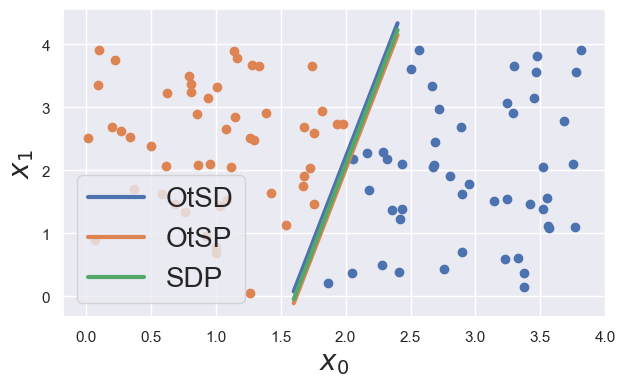

In [45]:
# Plot separation surface
start, end = 1.6, 2.4
plt.figure()
plt.rcParams["figure.figsize"] = (7,4)
plt.rcParams.update({'font.size': 40})
plt.plot(np.linspace(start, end), np.linspace(start, end) * (-w_OtSD[0]/w_OtSD[1]) - b_OtSD[0]/w_OtSD[1],
         linewidth=3)
plt.plot(np.linspace(start, end), np.linspace(start, end) * (-w_OtSP[0]/w_OtSP[1]) - b_OtSP[0]/w_OtSP[1],
         linewidth=3)
plt.plot(np.linspace(start, end), np.linspace(start, end) * (-w_SDP[0]/w_SDP[1]) - b_SDP[0]/w_SDP[1],
         linewidth=3)
plt.scatter(X_train[y_train.reshape(-1,)==1,0], X_train[y_train.reshape(-1,)==1,1])
plt.scatter(X_train[y_train.reshape(-1,)==-1,0], X_train[y_train.reshape(-1,)==-1,1])
plt.legend(["OtSD", "OtSP", "SDP"], fontsize=20)
plt.xlabel(r"$x_0$", fontsize=20)
plt.ylabel(r"$x_1$", fontsize=20)
plt.savefig("train_set.pdf", bbox_inches='tight')

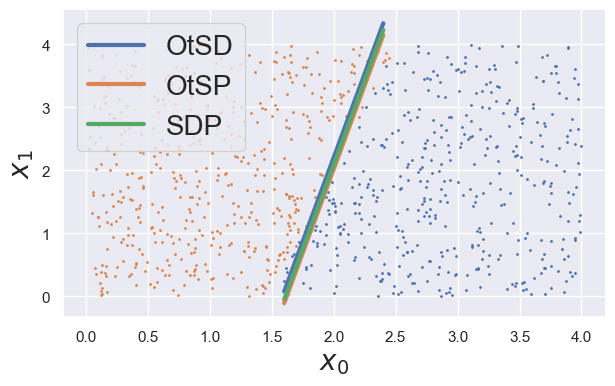

In [46]:
# Plot separation surface
start, end = 1.6, 2.4
plt.figure()
plt.rcParams["figure.figsize"] = (7,4)
plt.plot(np.linspace(start, end), np.linspace(start, end) * (-w_OtSD[0]/w_OtSD[1]) - b_OtSD[0]/w_OtSD[1],
         linewidth=3)
plt.plot(np.linspace(start, end), np.linspace(start, end) * (-w_OtSP[0]/w_OtSP[1]) - b_OtSP[0]/w_OtSP[1],
         linewidth=3)
plt.plot(np.linspace(start, end), np.linspace(start, end) * (-w_SDP[0]/w_SDP[1]) - b_SDP[0]/w_SDP[1],
         linewidth=3)
plt.scatter(X_test[y_test.reshape(-1,)==1,0], X_test[y_test.reshape(-1,)==1,1], s=1)
plt.scatter(X_test[y_test.reshape(-1,)==-1,0], X_test[y_test.reshape(-1,)==-1,1], s=1)
plt.legend(["OtSD", "OtSP", "SDP"], fontsize=20)
plt.xlabel(r"$x_0$", fontsize=20)
plt.ylabel(r"$x_1$", fontsize=20)
plt.savefig("test_set.pdf", bbox_inches='tight')